# CarND Extended Kalman Filter
Generate visualization of postion and velocity estimates from the Kalman filter in comparison to the ground truth.

In [51]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

## Define Data

In [261]:
data_files = {'Laser and Radar': 'out_data\out_LR.txt', 
              'Radar Only': 'out_data\out_R.txt', 
              'Lidar Only': 'out_data\out_L.txt'}

## Generate Plots

out_data\out_R.txt


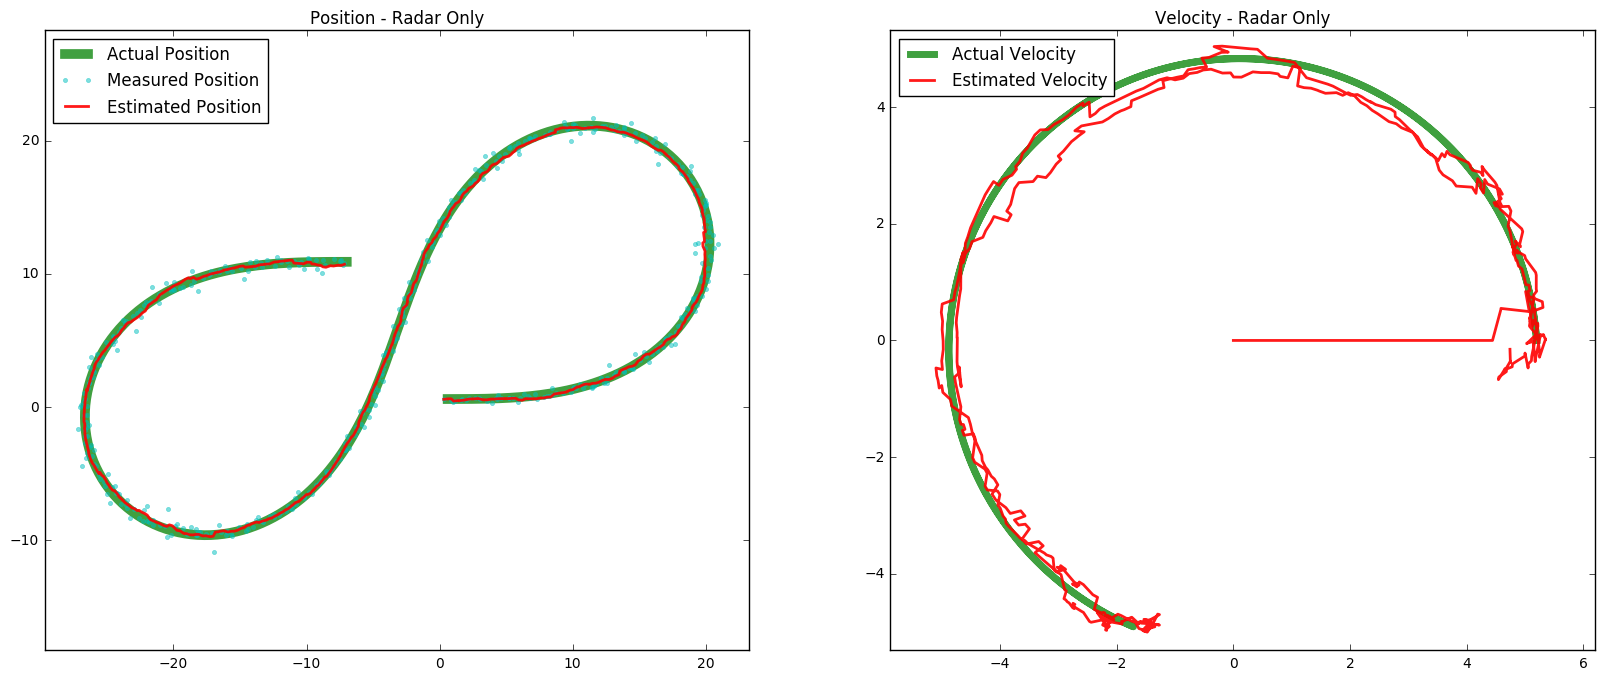

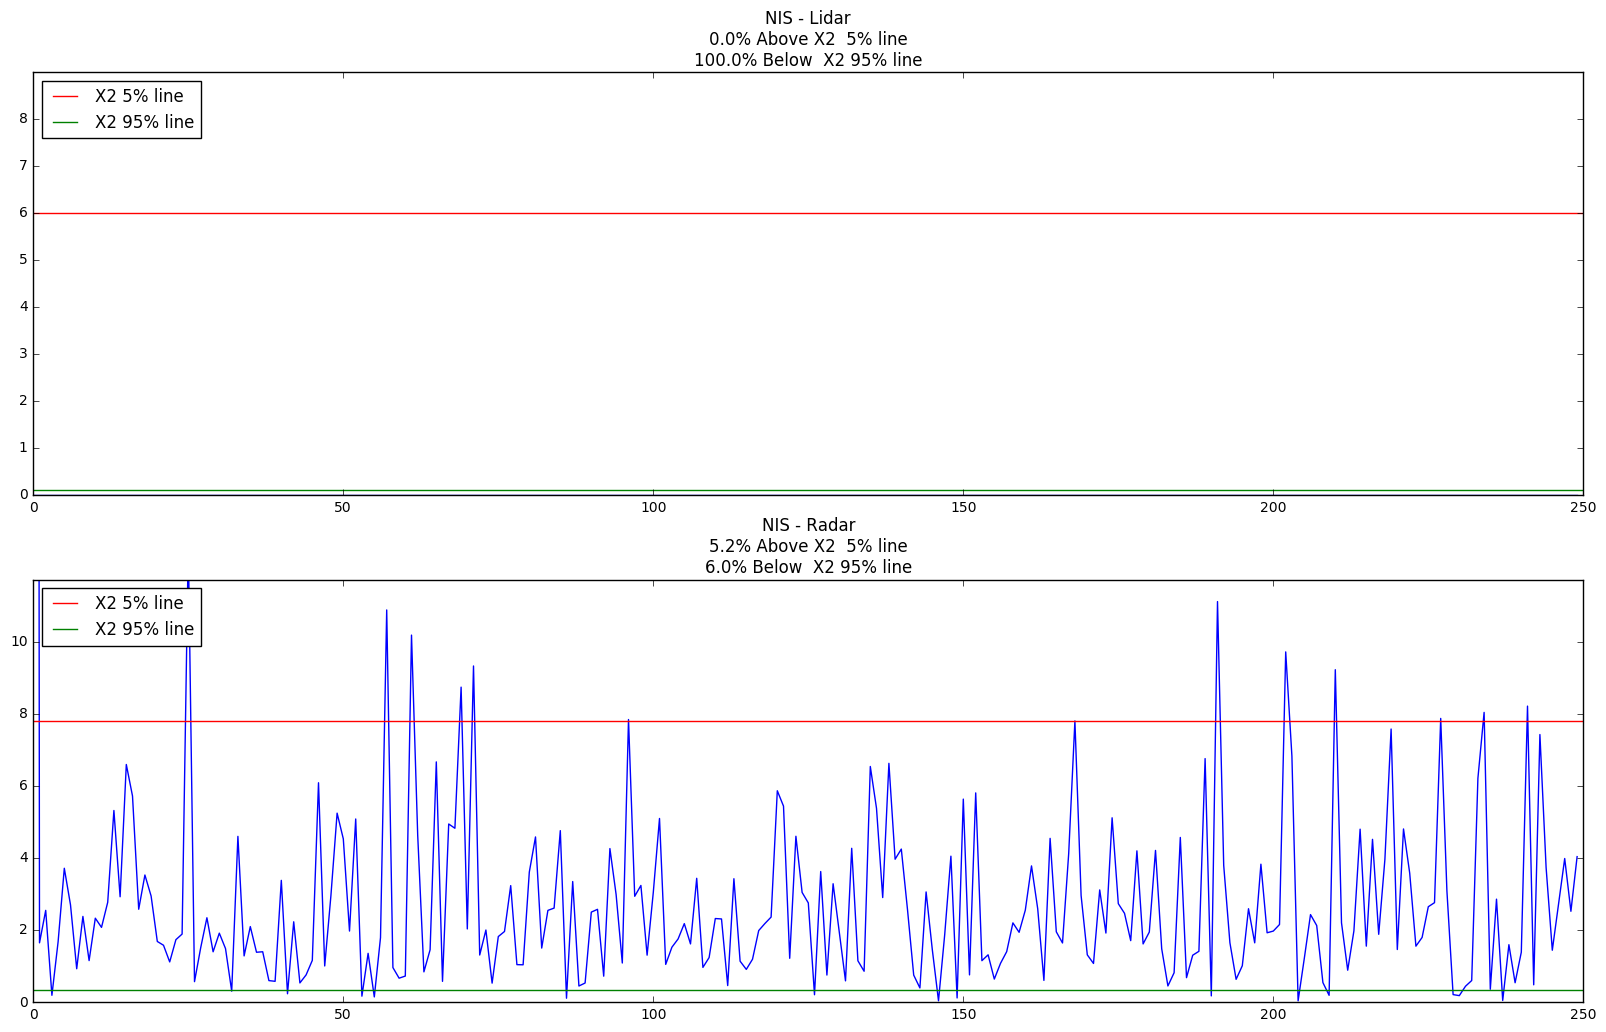

out_data\out_LR.txt


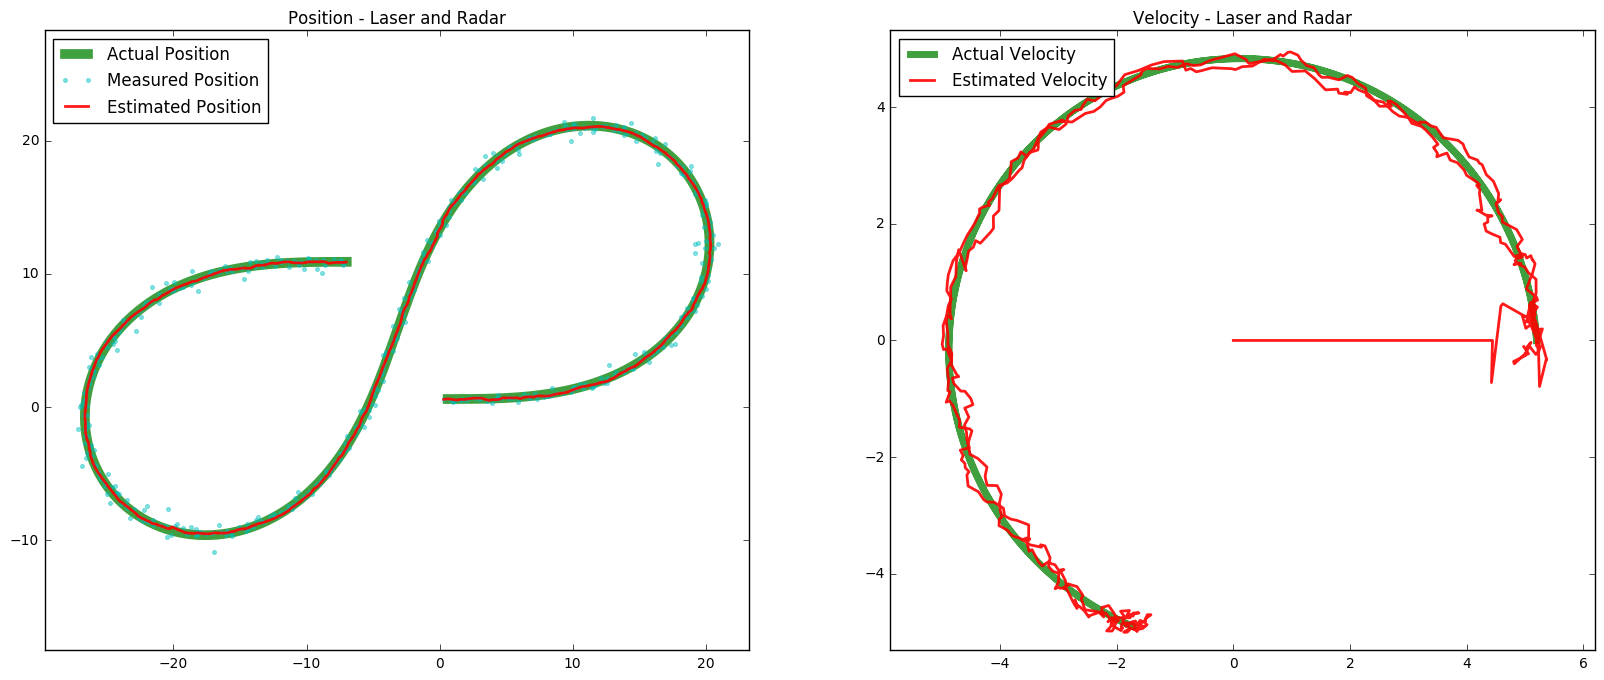

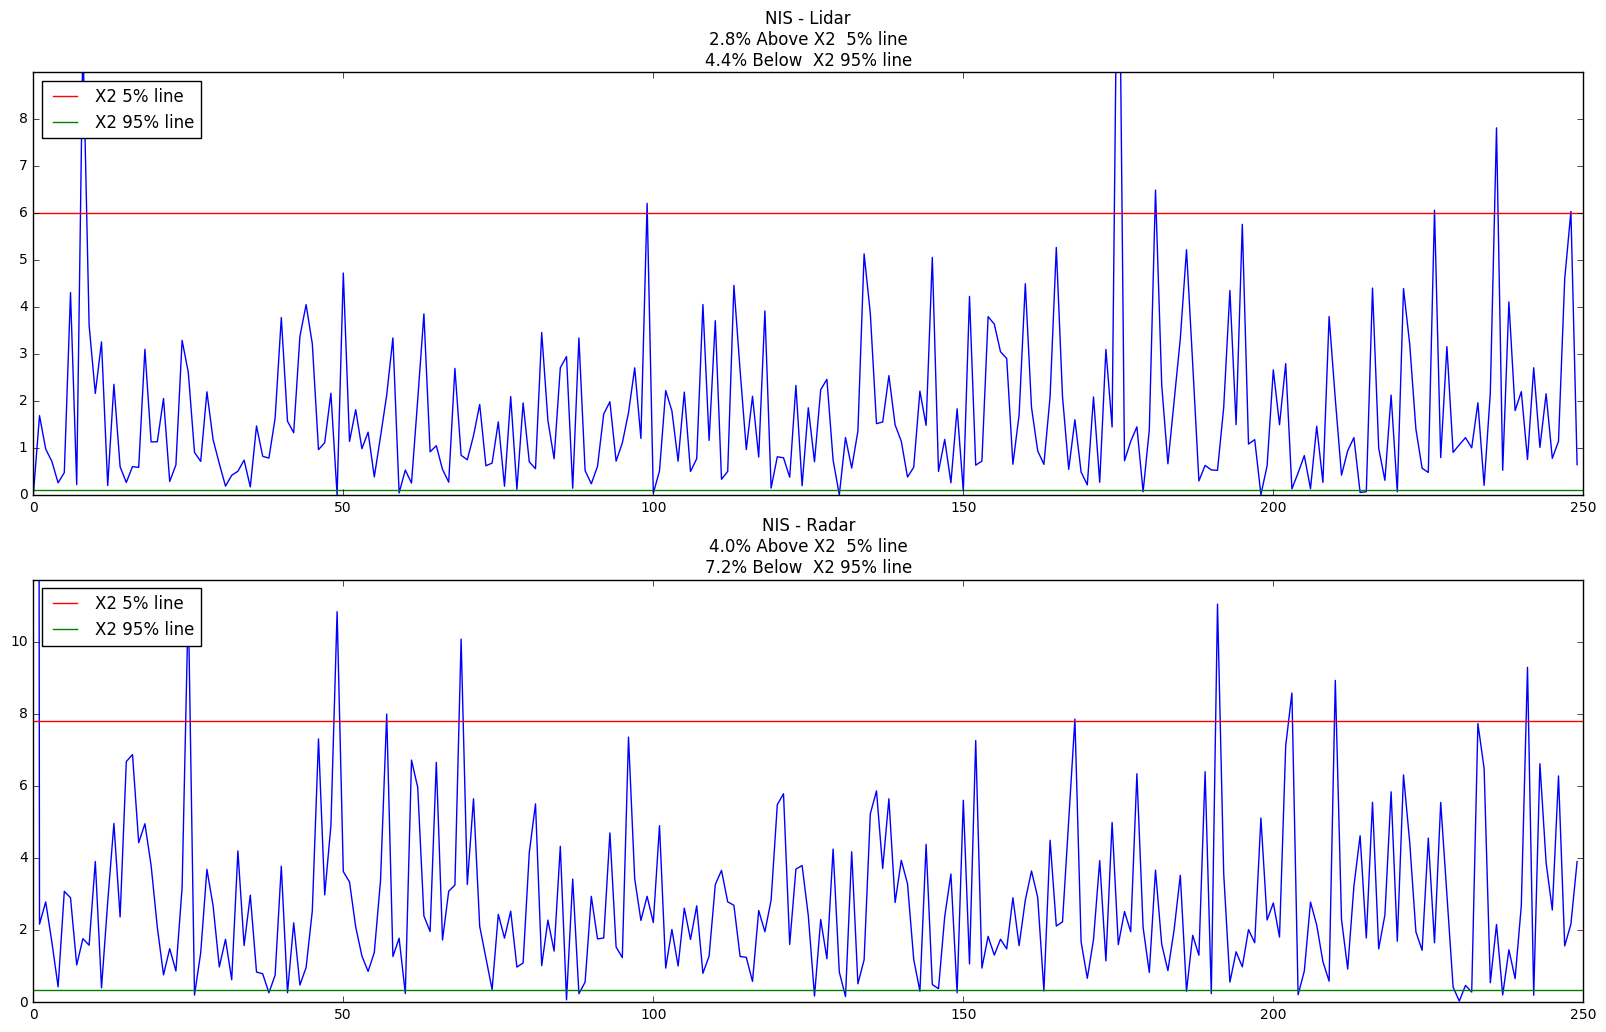

out_data\out_L.txt


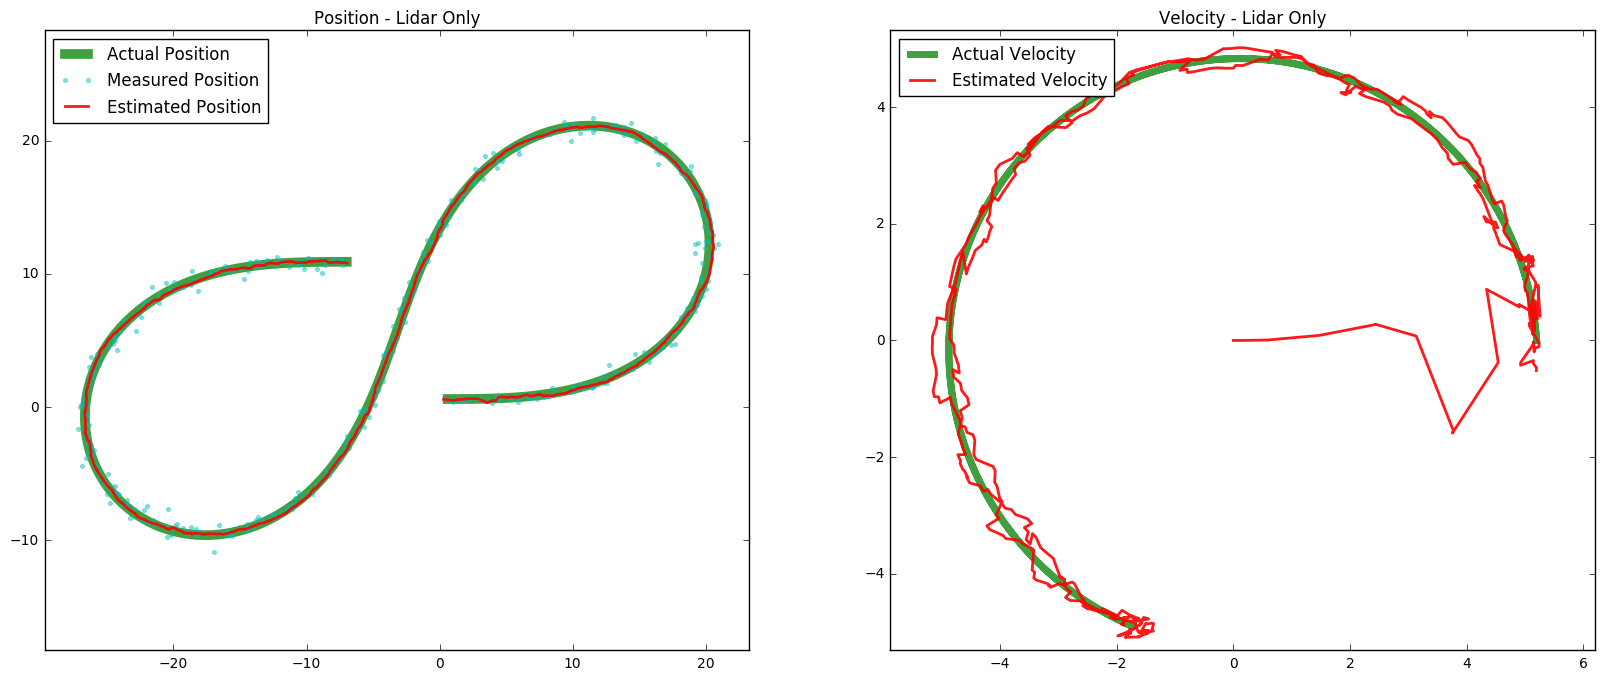

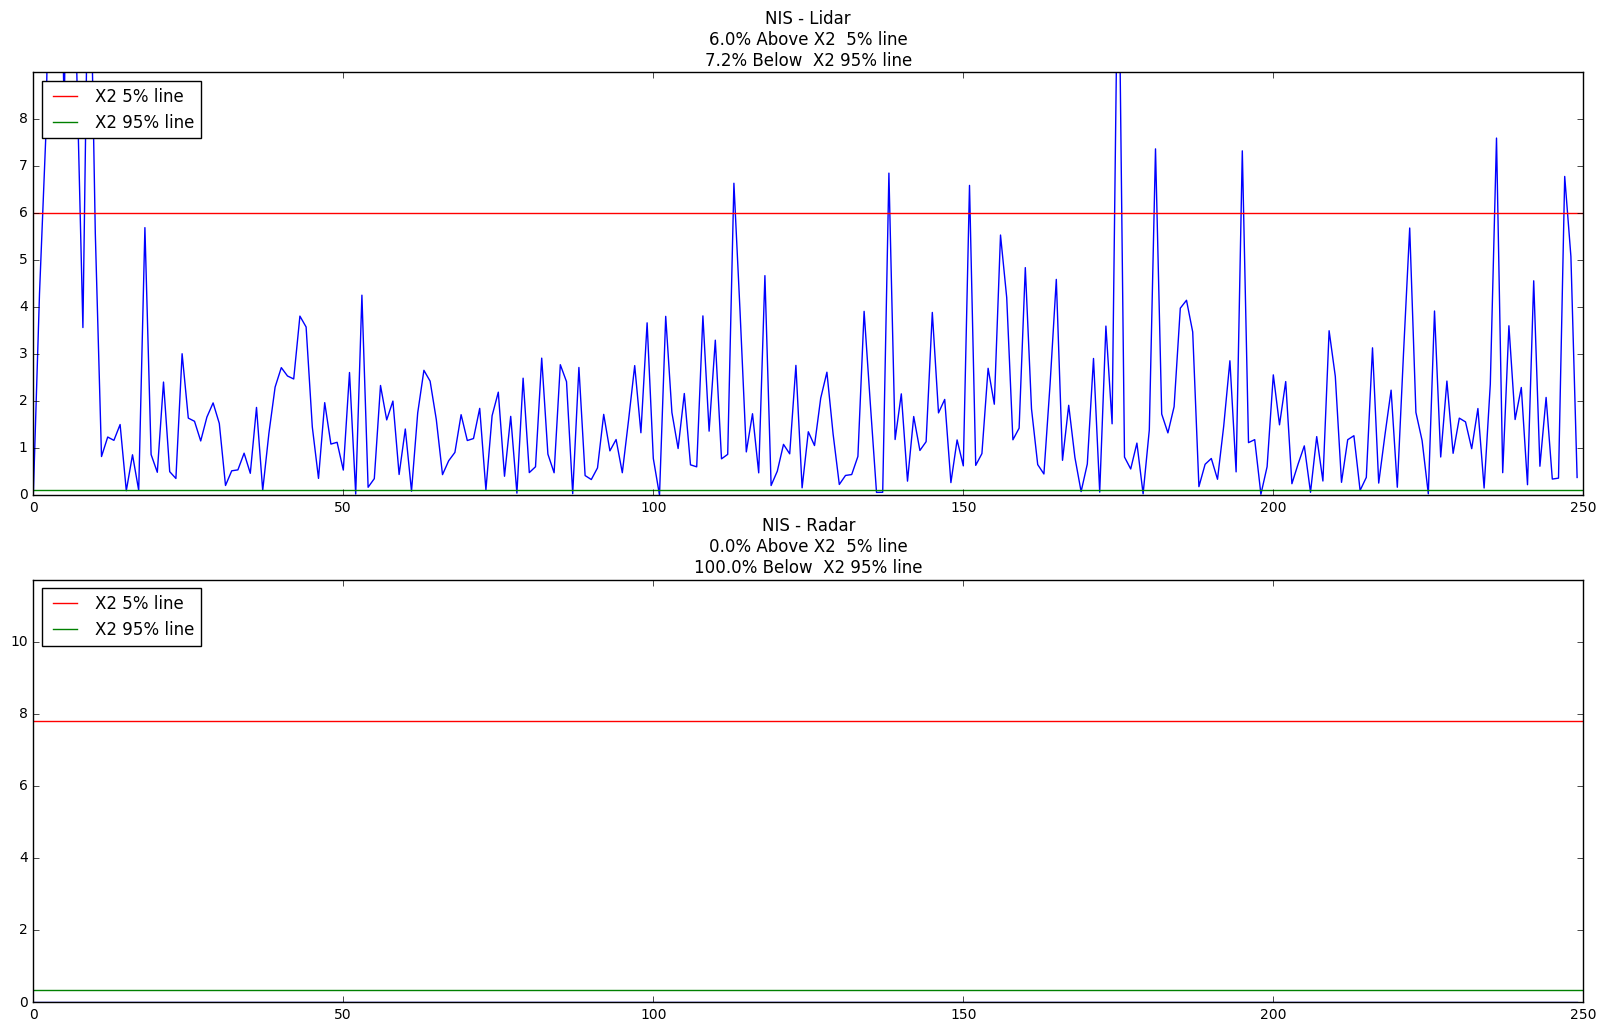

In [264]:
for file in data_files:
    print(data_files[file])
    data = np.genfromtxt(data_files[file], names = True, dtype="i8, f8, f8, f8, f8, f8, S5, f8, f8, f8, f8, f8, f8, f8") 
    plt.figure(figsize=(20, 8))
    
    # Position
    plt.subplot(1,2,1)
    plt.axis('equal')
    plt.plot(data['px_ground_truth'], 
             data['py_ground_truth'], 'g', alpha=0.75, linewidth=7, label='Actual Position')
    plt.plot(data['px_measured'], 
             data['py_measured'], 'c.', label='Measured Position', alpha = 0.5)
    plt.plot(data['px_state'], 
             data['py_state'], 'r', alpha=0.9, linewidth=2, label='Estimated Position')
    plt.xlim(min(data['px_ground_truth']-3), max(data['px_ground_truth']+3))
    plt.legend(loc=2)
    plt.title(str("Position - %s" % file))

    # Velocity
    plt.subplot(1,2,2)
    plt.axis('equal')
    plt.plot(data['vx_ground_truth'], data['vy_ground_truth'], 
             'g', alpha=0.75, linewidth=5, label='Actual Velocity')
    plt.plot(data['v_state']*np.cos(data['yaw_angle_state']), 
             data['v_state']*np.sin(data['yaw_angle_state']), 
             'r', alpha = 0.9, linewidth=2, label='Estimated Velocity')
    plt.title(str("Velocity - %s" % file))    
    plt.xlim(min(data['vx_ground_truth']-1), max(data['vx_ground_truth']+1))
    plt.legend(loc=2)
    plt.show()

    # NIS - Lidar
    plt.figure(figsize=(20, 12))
    plt.subplot(2,1,1)
    NIS_lidar = data['NIS'][data['sensor_type'] == b'lidar']
    plt.plot(NIS_lidar)
    lidar_X2 = (0.103, 5.991)
    plt.plot((0, len(NIS_lidar)), (lidar_X2[1], lidar_X2[1]), c='r', label = 'X2 5% line')
    plt.plot((0, len(NIS_lidar)), (lidar_X2[0], lidar_X2[0]), c='g', label = 'X2 95% line')
    low_lidar = len(NIS_lidar[NIS_lidar < lidar_X2[0]])/len(NIS_lidar)
    high_lidar = len(NIS_lidar[NIS_lidar > lidar_X2[1]])/len(NIS_lidar)
    plt.title('NIS - Lidar\n%3.1f%% Above X2  5%% line\n%3.1f%% Below  X2 95%% line' %(high_lidar*100, low_lidar*100))
    plt.ylim(0, 1.5*lidar_X2[1])
    plt.legend(loc=2)

    # NIS - Radar
    plt.subplot(2,1,2)
    NIS_radar = data['NIS'][data['sensor_type'] == b'radar']
    radar_X2 = (0.352, 7.815)
    plt.plot(NIS_radar)
    plt.plot((0, len(NIS_radar)), (radar_X2[1], radar_X2[1]), c='r',  label = 'X2 5% line')
    plt.plot((0, len(NIS_radar)), (radar_X2[0], radar_X2[0]), c='g', label = 'X2 95% line')
    low_radar = len(NIS_radar[NIS_radar < radar_X2[0]])/len(NIS_radar)
    high_radar = len(NIS_radar[NIS_radar > radar_X2[1]])/len(NIS_radar)
    plt.title('NIS - Radar\n%3.1f%% Above X2  5%% line\n%3.1f%% Below  X2 95%% line' %(high_radar*100, low_radar*100))
    plt.ylim(0, 1.5*radar_X2[1])
    plt.legend(loc=2)
    
    plt.show()